In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


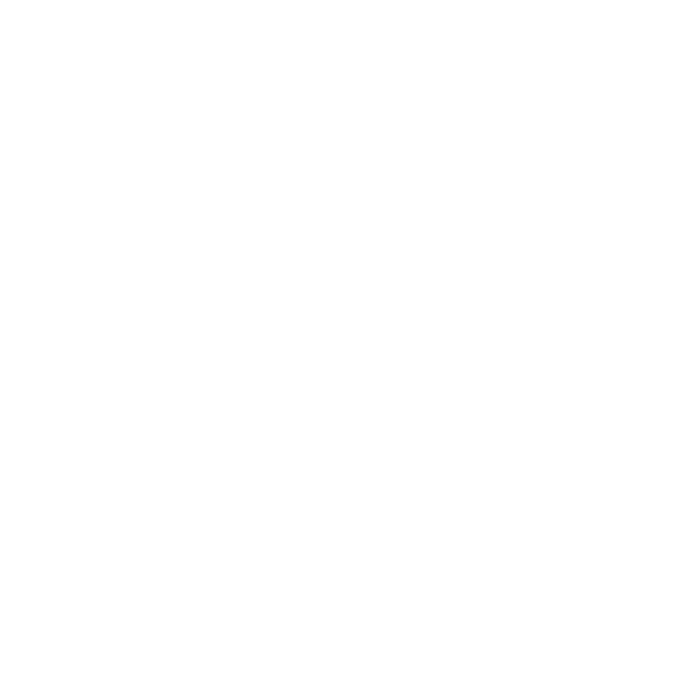

In [2]:
# Generating a map of all the weather stations from where the data has been taken

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [4]:
# Read the csv dataset

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
# Converting date column values to datetime and creating a separate index for date, month and year

df["Date"] = pd.to_datetime(df["Date"])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# converting temperature to tenth decimal place

df['Data_Value'] = df['Data_Value'].apply(lambda x:x/10)
df.head()

,ID,Date,Element,Data_Value,year,month,day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11,12
1,USC00208972,2009-04-29,TMIN,5.6,2009,4,29
2,USC00200032,2008-05-26,TMAX,27.8,2008,5,26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11,11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,2,27


In [19]:
# removing leap days from the data
df = df[~((df['month']==2) & (df['day']==29))]

# getting the maximum and minimum temperature for each day between the year 2005-2014
max = df[(df['Element']=='TMAX') & (df['year']>=2005) & (df['year']<2015)].groupby(['month','day']).aggregate({'Data_Value':np.max})
min = df[(df['Element']=='TMIN') & (df['year']>=2005) & (df['year']<2015)].groupby(['month','day']).aggregate({'Data_Value':np.min})
max.head(31)

Data_Value
month day            
1     1         -16.0
      2         -26.7
      3         -26.7
      4         -26.1
      5         -15.0
      6         -26.6
      7         -30.6
      8         -29.4
      9         -27.8
      10        -25.6
      11        -18.3
      12        -19.3
      13        -25.0
      14        -26.6
      15        -27.2
      16        -29.4
      17        -29.4
      18        -28.9
      19        -30.0
      20        -23.9
      21        -26.0
      22        -27.7
      23        -25.0
      24        -26.7
      25        -24.3
      26        -23.8
      27        -23.9
      28        -29.4
      29        -27.8
      30        -23.3
      31        -19.4

In [20]:
# getting the maximum and minimum temperature for each day for the year 2015

max_2015 = df[(df['Element']=='TMAX') & (df['year']==2015)].groupby(['month','day']).aggregate({'Data_Value':np.max})
min_2015 = df[(df['Element']=='TMIN') & (df['year']==2015)].groupby(['month','day']).aggregate({'Data_Value':np.min})
max_2015.head()

Data_Value
month day            
1     1           1.1
      2           3.9
      3           3.9
      4           4.4
      5           2.8

In [24]:
# the days at which the temperature was higher or lower in 2015 as compare to the previous decade

difference_max = np.where(max_2015['Data_Value'] > max['Data_Value'])[0]
difference_min = np.where(min_2015['Data_Value'] < min['Data_Value'])[0]
print(max_2015.iloc[difference_max])
# a = df['ID']=='USW00094889'
# print(df.where(a).dropna().sort_values(by="Date"))

# print(df[df['ID']=='USW00094889'].sort_values(by="Date"))

           Data_Value
month day            
2     9           8.3
4     17         27.8
5     7          30.6
      8          33.3
      11         30.6
      18         31.7
7     27         33.9
      29         36.1
8     19         32.8
9     7          35.0
      8          33.9
      16         31.1
      17         31.7
      18         30.0
      28         29.4
      29         28.3
10    20         27.2
11    2          22.8
      3          26.1
      4          26.1
      5          25.6
      6          23.9
      18         20.0
12    7          10.0
      8          10.0
      9          12.2
      10         15.0
      11         15.6
      12         20.0
      13         19.4
      14         18.3
      15         16.1
      16         15.0
      23         18.3
      24         17.2
      25         11.1
      26         11.7


<IPython.core.display.Javascript object>


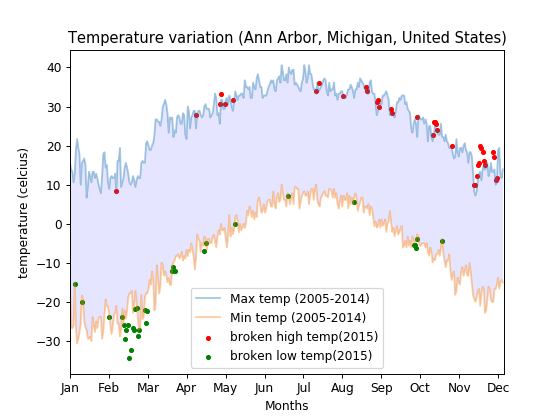

In [26]:
plt.figure()
plt.plot(max.values, label = 'Max temp (2005-2014)', alpha = 0.4)
plt.plot(min.values, label = 'Min temp (2005-2014)', alpha = 0.4)
plt.xlabel('Months')
plt.ylabel('temperature (celcius)')
plt.gca().fill_between(range(len(max)), max['Data_Value'], min['Data_Value'], facecolor = 'blue', alpha = 0.1)
plt.scatter(difference_max, max_2015.iloc[difference_max], s = 10, color = 'red', label = 'broken high temp(2015)')
plt.scatter(difference_min, min_2015.iloc[difference_min], s = 10, color = 'green', label = 'broken low temp(2015)')
plt.legend()
plt.xticks(np.linspace(0, 30 + 30*11 , num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec', ))
plt.xlim(0,365)
plt.title('Temperature variation (Ann Arbor, Michigan, United States)')